# Regression models with random forest

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Load the data set

In [2]:
df = pd.read_csv('EGFR_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

# Input features

The Pks13 data set contains 881 input features (unique PubChem fingerprints) and 1 output variable (pIC50 values). The unique PubChem fingerprint of each molecule will allow the machine learning algorithm to learn from the unique molecular properties of each inhibitor of Pks13 in order to create a model that will be able to distinguish between active and inactive compounds. The goal of building this model is to determine which functional groups are essential for designing a potent drug to inhibit Pks13.

In [3]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13892,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13893,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13894,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13895,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Output features

In [4]:
Y = df.pIC50
Y

0        7.387216
1        6.522879
2        5.106793
3        6.769551
4        7.397940
           ...   
13892    7.698970
13893    8.338187
13894    6.000000
13895    6.000000
13896    6.000000
Name: pIC50, Length: 13897, dtype: float64

Examine the data dimensions

In [5]:
X.shape

(13897, 881)

In [6]:
Y.shape

(13897,)

Remove low variance features

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

Notice how the number of PubChem fingerprints decreased from 881 to 158

In [8]:
X.shape

(13897, 139)

# Data split (80/20 ratio)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
X_train.shape, Y_train.shape

((11117, 139), (11117,))

In [11]:
X_test.shape, Y_test.shape

((2780, 139), (2780,))

# Build a regression model using random forest

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

In [14]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.25336866817389236

In [15]:
Y_pred = model.predict(X_test)

# Scatter plot of experimental vs. predicted pIC50 values

C:\Users\cmkin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

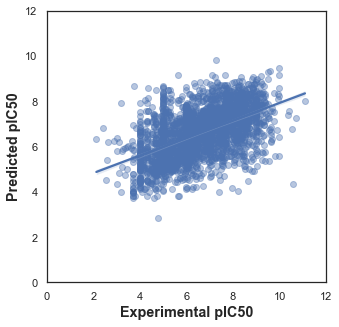

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.savefig('EGFR_plot_experimental_vs_predicted_pIC50.pdf')
plt.show